# Regresion - Dataset de Calidad de Vino

## Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

from ucimlrepo import fetch_ucirepo

## Dataset

El dataset de calidad de vinos se importa desde `ucimlrepo`, un repositorio de Python que permite importar los datasets de UC Irvine Machine Learning Repository. Para importarlo se usa el id 186.

In [2]:
wine_quality = fetch_ucirepo(id=186)

In [3]:
wine_quality.metadata

{'uci_id': 186,
 'name': 'Wine Quality',
 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality',
 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv',
 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).',
 'area': 'Business',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 4898,
 'num_features': 11,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['quality'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2009,
 'last_updated': 'Wed Nov 15 2023',
 'dataset_doi': '10.24432/C56S3T',
 'creators': ['Paulo Cortez',
  'A. Cerdeira',
  'F. Almeida',
  'T. Matos',
  'J. Reis'],
 'intro_paper': {'title': 'Modeling wine preferences 

In [4]:
wine_quality.variables

,name,role,type,demographic,description,units,missing_values
0,fixed_acidity,Feature,Continuous,None,None,None,no
1,volatile_acidity,Feature,Continuous,None,None,None,no
2,citric_acid,Feature,Continuous,None,None,None,no
3,residual_sugar,Feature,Continuous,None,None,None,no
4,chlorides,Feature,Continuous,None,None,None,no
5,free_sulfur_dioxide,Feature,Continuous,None,None,None,no
6,total_sulfur_dioxide,Feature,Continuous,None,None,None,no
7,density,Feature,Continuous,None,None,None,no
8,pH,Feature,Continuous,None,None,None,no
9,sulphates,Feature,Continuous,None,None,None,no


### Features & Target

In [5]:
X = wine_quality.data.features
y = wine_quality.data.targets

data = X.join(y)

In [6]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


### Valores faltantes

### Visualización de datos

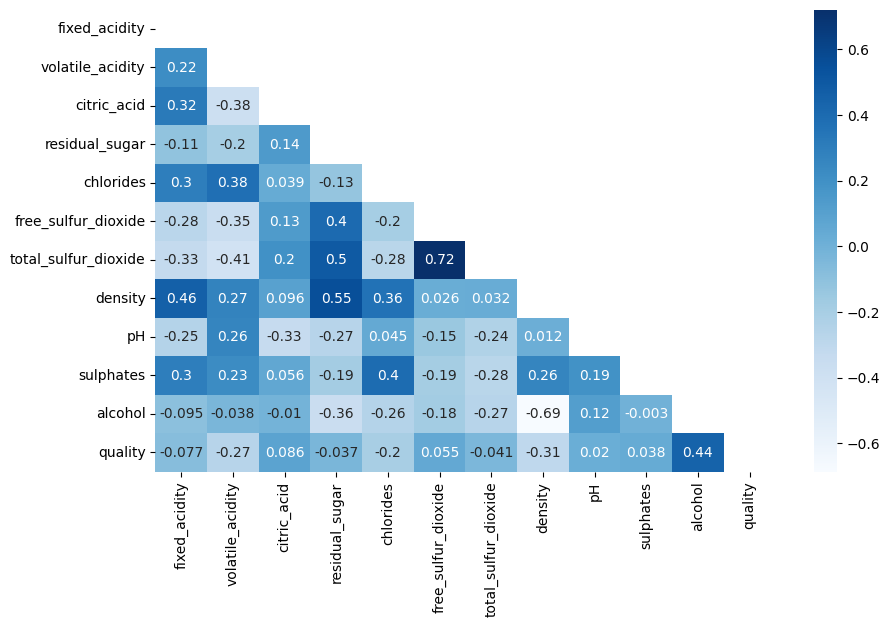

In [10]:
correlation = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='Blues', mask=np.triu(correlation))
plt.show()

## Normalización de los datos

In [14]:
scaler = StandardScaler()

In [15]:
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
scaled_X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464


In [16]:
scaled_y = pd.DataFrame(scaler.fit_transform(y), columns=y.columns)
scaled_y.head()

,quality
0,-0.937230
1,-0.937230
2,-0.937230
3,0.207999
4,-0.937230


## División del Dataset: Train y Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X,
    scaled_y,
    test_size=0.25,
    random_state=15
)

## Entrenamiento y Evaluación del modelo de Regresión

### Regresión Lineal

In [18]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = linear_regression.predict(X_test)
y_pred

array([[-0.25325726],
       [ 0.83743384],
       [ 0.45013786],
       ...,
       [-0.63094803],
       [-0.76146654],
       [-0.06456847]])

In [20]:
mse = mean_squared_error(y_test, y_pred)
mse

0.6754159927737186

In [21]:
r2 = r2_score(y_test, y_pred)
r2

0.30725507585895007

### Regresión de Ridge

In [22]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [23]:
y_pred = ridge.predict(X_test)
y_pred

array([[-0.25314063],
       [ 0.83694806],
       [ 0.45013827],
       ...,
       [-0.63103918],
       [-0.76091326],
       [-0.06476723]])

In [24]:
mse = mean_squared_error(y_test, y_pred)
mse

0.675425172669913

In [25]:
r2 = r2_score(y_test, y_pred)
r2

0.3072456604371051

### MLP para Regresión

In [26]:
mlp = MLPRegressor(
    hidden_layer_sizes=50,
    activation='relu',
    random_state=1,
    max_iter=500
)
mlp.fit(X_train, y_train.values.ravel())

MLPRegressor(hidden_layer_sizes=50, max_iter=500, random_state=1)

In [27]:
y_pred = mlp.predict(X_test)
y_pred

array([-0.58541084,  0.42320978,  0.41128587, ..., -0.47970854,
       -1.02324058,  0.1885532 ])

In [28]:
mse = mean_squared_error(y_test, y_pred)
mse

0.5981667530289488

In [29]:
r2 = r2_score(y_test, y_pred)
r2

0.38648627455648044